# Mid Semester Project - DEEP Reinforcements Learning
# ENV1 - EMPTY GRID ENVIRONMENT
Dear students,<br> this is the template notebook. Please copy it by clicking on the "File" tab and then on "Save a copy into drive".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:
<br><br>
<img src="https://raw.githubusercontent.com/Farama-Foundation/Minigrid/master/minigrid-text.png">

### https://minigrid.farama.org/

# Pre-Requisit

## Installs

In [3]:
# %%capture
# !sudo apt-get update
# !sudo apt-get install -y xvfb ffmpeg freeglut3-dev
# !pip install 'imageio==2.4.0'
# !pip install gym
# !pip install gym-minigrid
# !pip install pygame
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install pyvirtualdisplay
# !pip install piglet
# !pip install gym
# !apt-get install python-opengl -y
# !apt install xvfb -y
# !pip install -U --no-cache-dir gdown --pre

## Imports

In [4]:
import numpy as np
import gym
from gym import logger as gymlogger
from gym.utils import seeding
from gym import error, spaces, utils
gymlogger.set_level(40) # error only
import glob
import io
import base64
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2
import math
import glob
from pyvirtualdisplay import Display
from IPython.display import HTML
from IPython import display as ipythondisplay
import pygame
import pyvirtualdisplay
import imageio
import IPython
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical
torch.manual_seed(0) # TODO: remove it

/Users/neriya.shulman/Desktop/neriya/projects/rl/deep_rl/venv/lib/python3.11/site-packages/gym/envs/registration.py:307: DeprecationWarning: The package name gym_minigrid has been deprecated in favor of minigrid. Please uninstall gym_minigrid and install minigrid with `pip install minigrid`. Future releases will be maintained under the new package name minigrid.
  fn()


In [5]:
# TODO: remove the block
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")


tensor([1.], device='mps:0')


## Display utils
The cell below contains the video display configuration. No need to make changes here.

In [6]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)
# TODO: uncomment
# display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

#Env1 - Empty Env

## Class Env

In [7]:
from __future__ import annotations
from gym_minigrid.minigrid import COLOR_NAMES
from gym_minigrid.minigrid import Grid
from gym_minigrid.minigrid import MissionSpace
from gym_minigrid.minigrid import Door, Goal, Key, Wall, Lava, Floor
from minigrid_x import MiniGridEnv
from gym import spaces
import random

class RandomEmptyEnv_10(MiniGridEnv):
    def __init__(
        self,
        size=10, # DEFINE THE WIDTH AND HEIGHT
        agent_start_pos=(1, 1),
        agent_start_dir = 0,
        max_steps: int | None = None,
        **kwargs,
    ):

        self.agent_start_pos = agent_start_pos
        self.agent_start_dir = agent_start_dir

        agent_start_x_loc =random.randint(1, 6)
        agent_start_y_loc =random.randint(1, 6)

        self.agent_start_pos = (agent_start_x_loc,agent_start_y_loc)

        mission_space = MissionSpace(mission_func=self._gen_mission)

        if max_steps is None:
            max_steps = 4 * size**2

        super().__init__(
            mission_space=mission_space,
            grid_size=size,
            # Set this to True for maximum speed
            see_through_walls=True,
            max_steps=max_steps,
            **kwargs,
        )
        self.action_space = spaces.Discrete(3)
        self.walls_init = []

        # change 21-09 for random env
        self.not_goal_loc = [(col,row) for col in range(self.unwrapped.width) for row in range(self.unwrapped.height) if row == 0 or row == (self.unwrapped.width-1) or col == 0 or col == (self.unwrapped.height-1)]
        self.not_goal_loc.append(self.agent_start_pos)
        self.goal_pos = (self.grid.width - 2, self.grid.height - 2)

    def reset(self, **kwargs):
        # Randomize start position each time environment is reset
        agent_start_x_loc = random.randint(1, 6)
        agent_start_y_loc = random.randint(1, 6)
        self.agent_start_pos = (agent_start_x_loc, agent_start_y_loc)

        self.values = [0, 1, 2, 3]
        self.agent_start_dir = random.choice(self.values)

        # Recalculate not_goal_loc as it depends on the agent's start position
        self.not_goal_loc = [(col, row) for col in range(self.unwrapped.width) for row in range(self.unwrapped.height)
                             if row == 0 or row == (self.unwrapped.width - 1) or col == 0 or col == (self.unwrapped.height - 1)]
        self.not_goal_loc.append(self.agent_start_pos)

        # Call the reset method of the parent class
        return super().reset(**kwargs)

    @staticmethod
    def _gen_mission():
        return "grand mission"

    def _gen_grid(self, width, height):
        # Create an empty grid
        self.grid = Grid(width, height)

        # Generate the surrounding walls
        self.grid.wall_rect(0, 0, width, height)

        # Generate verical separation wall
        # for i in range(0, height):
        #     self.grid.set(5, i, Wall())


        for column, row in self.walls_init:
          self.grid.set(column, row, Wall())

        self.key_pos = (6, 5)
        self.door_pos = (6, 7)

        self.goal_pos = random.choice([(8,1), (8,8), (1,8)])

        self.put_obj(Goal(), self.goal_pos[0], self.goal_pos[1])

        # Place the agent
        if self.agent_start_pos is not None:
            self.agent_pos = self.agent_start_pos
            self.agent_dir = self.agent_start_dir
        else:
            self.place_agent()

        self.mission = "grand mission"


## WRAPPER

In [8]:
class EMPTYRGBImgObsWrapper(gym.core.ObservationWrapper):
    """
    Wrapper to use fully observable RGB image as the only observation output,
    no language/mission. This can be used to have the agent to solve the
    gridworld in pixel space.
    """

    def __init__(self, env, tile_size=32, plot=False, preprocess= lambda x: x):
        super().__init__(env)
        self.tile_size = tile_size
        self.plot = plot
        self.observation_space = spaces.Box(
            low=0,
            high=255,
            # #the default is (320,320,3). Tile size  = 32 X 10 (grid size)
            # TODO: BE CAREFULL TO CHANGE the shape size to be according your preprocess size/channels
            # The env information i staken from here
            shape=(320, 320, 3),
            dtype='uint8'
        )
        self.prev_door = False
        self.prev_key = False
        self.action_space = spaces.Discrete(self.action_space.n)

        #TODO: THINK AND TEST DIFFERENT PREPROCESS
        self._preprocess = lambda x: x


    def observation(self, obs):
      env = self.unwrapped

      # Call render without any unsupported keyword arguments
      rgb_img = env.render()  # Use the default rendering behavior
      return rgb_img

    def reset(self, seed = 0, options = None):
        self.prev_door = False
        self.prev_key = False
        obs, info = super().reset()
        if self.plot:
            plt.show()
        return self._preprocess(obs), info

    def step(self, action):
        #action = ACTION_MAP[action]
        obs, r, d, info, x = super().step(action)
        obs = self._preprocess(obs)

        # TODO: REWARD SHAPING
        #we encourage you to come up with a better reward function using  self.is_door_open() and self.is_carrying_key()

        return obs, r, d, info, x

## Env Info

(320, 320, 3)


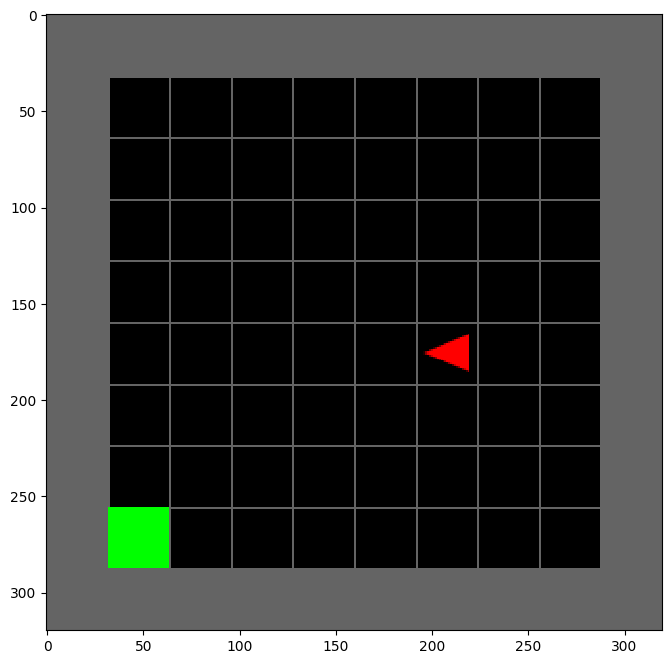

In [9]:
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
obs = env.reset()[0]
print(obs.shape)
screen = env.render()
plt.imshow(screen)

In [10]:
state_size = obs.shape  # Replace with your actual state size
action_space = env.action_space
num_actions = action_space.n
print(f"Number of actions: {num_actions}")
print(f"State size is: {state_size}")

Number of actions: 3
State size is: (320, 320, 3)


## Random action

In [11]:
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
obs = env.reset()
# video_filename = '/content/vid.mp4' # TODO: uncomment
video_filename = 'dl/vid.mp4'
max_steps = 100
# Evaluation
with imageio.get_writer(video_filename, fps=10) as video:
  obs = env.reset()
  done = False
  total_reward = 0
  for step in range(max_steps):
      action = env.action_space.sample()
      obs, reward, done, _, _ = env.step(action)
      next_obs = obs  # Get agent's position directly from the environment
      video.append_data(env.render())
      if done:
        print("done","reward=", total_reward,"num_of_steps=",step)
        break
embed_mp4(video_filename)

# Our Solution:

In [12]:
# TODO: change base path
base_dir = "./"
# base_dir = "/content/"

### Our Wrapper

In [13]:
class PreprocessWrapper(EMPTYRGBImgObsWrapper):
    """
    Wrapper to use fully observable RGB image as the only observation output,
    no language/mission. This can be used to have the agent to solve the
    gridworld in pixel space.
    """

    def __init__(self, env, resize_shape=(144, 144)):
        super().__init__(env)
        self.resize_shape = resize_shape
        self.observation_space = spaces.Box(
            low=0,
            high=255,
            shape=(1, self.resize_shape[0], self.resize_shape[1]),  # Grayscale image
            dtype='uint8'
        )
        self._preprocess = lambda x: PreprocessWrapper._preprocess(self, x)

    def _preprocess(self, obs):
        # crop the outer frame of the image and convert to grayscale
        cropped_obs = obs[32:-31, 32:-31]
        obs_gray = cv2.cvtColor(cropped_obs, cv2.COLOR_RGB2GRAY)
        
        red_mask = np.all(cropped_obs == [0, 0, 255], axis=-1)  # Check for red pixels (BGR format)
        blue_mask = np.all(cropped_obs == [255, 0, 0], axis=-1)  # Check for blue pixels (BGR format)
        obs_gray[red_mask] = 100  # Replace red pixels with 0
        obs_gray[blue_mask] = 255  # Replace blue pixels with 0
        obs_resized = cv2.resize(obs_gray, self.resize_shape)
        # obs_resized = cv2.resize(obs_gray, self.resize_shape, interpolation=cv2.INTER_NEAREST) #  TODO: remove it 

        # Add channel dimension to make it (H, W, 1)
        obs_resized = np.expand_dims(obs_resized, axis=0)
        return obs_resized

    def step(self, action):
        #action = ACTION_MAP[action]
        obs, r, d, info, x = super().step(action)
        if r > 0:
            r = 5000 # agent reach the goal
        else:
            r = -0.1
        return obs, r, d, info, x

original obs.shape is (320, 320, 3)
obs.shape is (1, 144, 144)


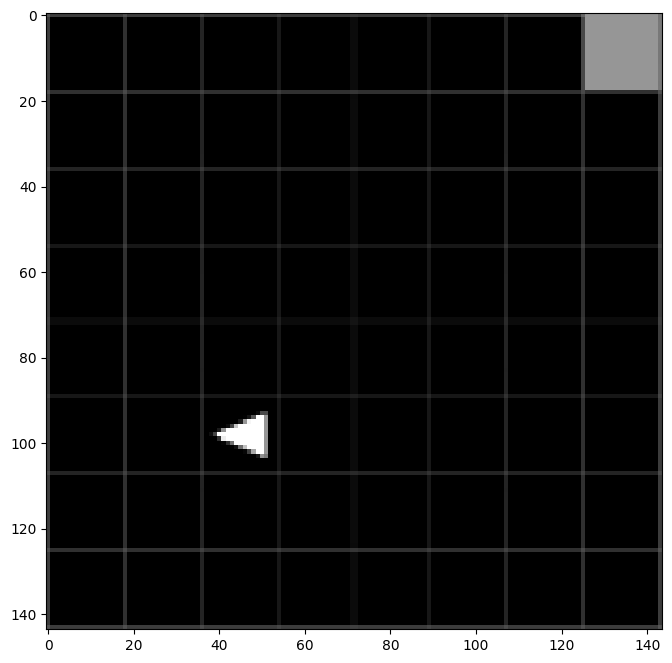

In [14]:
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
obs = env.reset()[0]

print(f'original obs.shape is {obs.shape}')
env = PreprocessWrapper(env)
obs = env.reset()[0]
obs = env.step(0)[0]
print(f'obs.shape is {obs.shape}')
plt.imshow(obs[0], cmap='gray')

### Network

In [15]:
state_size = obs.shape  # Replace with your actual state size
action_space = env.action_space
num_actions = action_space.n
print(f"Number of actions: {num_actions}")
print(f"State size is: {state_size}")
action_size = num_actions

Number of actions: 3
State size is: (1, 144, 144)


Unlike value-based method, the output of policy-based method is the probability of each action. It can be represented as policy. So activation function of output layer will be softmax, not ReLU.


In [16]:

class PolicyNetwork(nn.Module):
    def __init__(self, state_shape, action_size, seed):
        super(PolicyNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        print(state_shape)
        # self.conv = nn.Sequential(
        #     nn.Conv2d(1, 32, kernel_size=3, stride=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2),
        #     nn.Conv2d(32, 64, kernel_size=3, stride=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2),
        #     nn.Conv2d(64, 64, kernel_size=3, stride=1),
        #     nn.ReLU(),
        #     nn.MaxPool2d(kernel_size=2, stride=2)
        # )
        
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        print(f'input shape: {state_shape}')
        dummy_input = torch.zeros(1, *state_shape)
        conv_out_size = self.conv(dummy_input).view(1, -1).size(1)
        
        # self.fc = nn.Sequential(
        #     nn.Linear(conv_out_size, 512),
        #     nn.ReLU(),
        #     nn.Linear(512, 32),
        #     nn.ReLU(),
        #     nn.Dropout(),
        #     nn.Linear(32, action_size),
        #     # nn.Linear(512, action_size),
        #     nn.Softmax(dim=-1)
        # )
        
        self.fc = nn.Sequential(
            nn.Linear(conv_out_size, 128),
            nn.ReLU(),
            nn.Dropout(p=0.6),
            nn.Linear(128, action_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, state):
        conv_out = self.conv(state).view(state.size()[0], -1)
        return self.fc(conv_out)

    def run(self, state):
        # Automatically use the device of the model's parameters
        device = next(self.parameters()).device
        state = torch.from_numpy(state).float().to(device)
        # state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        probs = self.forward(state)
        m = Categorical(probs)
        action = m.sample()
        
        return action.item(), m.log_prob(action)
    
model = PolicyNetwork(state_size, action_size, 0)
print(model)


(1, 144, 144)
input shape: (1, 144, 144)
PolicyNetwork(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=12544, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
    (4): Softmax(dim=-1)
  )
)


Utils:

In [17]:
def play_game_and_create_video(policy, video_output_file_name):
  env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
  env = PreprocessWrapper(env)
  obs = env.reset()[0]
  max_steps = 100
  # Evaluation
  with imageio.get_writer(video_output_file_name, fps=10) as video:
    obs = env.reset()[0]
    state = obs
    done = False
    total_reward = 0
    for step in range(max_steps):
        action, _ = policy.run(state)
        obs, reward, done, _, _ = env.step(action)
        total_reward += reward
        state = obs  # Get policy's position directly from the environment
        video.append_data(env.render())
        if done:
          print("done", "reward=", total_reward,"num_of_steps=", step)
          break

### Training

In [18]:

def train(policy, optimizer, env, n_episodes, max_steps, discount, document_epsiodes=[]):
    scores_window = deque(maxlen=100)
    steps_window = deque(maxlen=100)
    scores = []
    steps = []
    
    for i_episode in range(1, n_episodes+1):
        saved_log_probs = []
        rewards = []
        state, _ = env.reset()
        for t in range(1, max_steps+1):
            action, log_prob = policy.run(state)
            saved_log_probs.append(log_prob)
            state, reward, done, _, _ = env.step(action)
            rewards.append(reward)
            if done:
                break
        steps_window.append(t)
        steps.append(t)
        scores_window.append(sum(rewards))
        scores.append(sum(rewards))

        discounts = [discount**i for i in range(len(rewards)+1)]
        R = sum([a*b for a,b in zip(discounts, rewards)])

        policy_loss = []
        for log_prob in saved_log_probs:
            policy_loss.append(-log_prob * R)
        policy_loss = torch.cat(policy_loss).sum()

        optimizer.zero_grad()
        policy_loss.backward()
        optimizer.step()
        print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.8f}\t Average Steps: {np.mean(steps_window):.3f}', end="")
        if i_episode % 100 == 0:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.mean(scores_window):.8f}\t Average Steps: {np.mean(steps_window):.3f}')
        if i_episode in document_epsiodes:
            play_game_and_create_video(policy, os.path.join(base_dir, f'pg_vid_{i_episode}.mp4'))
            
    play_game_and_create_video(policy, os.path.join(base_dir, f'pg_vid_final.mp4'))
    return scores, steps


In [19]:
state_size = obs.shape  # Replace with your actual state size
action_space = env.action_space
num_actions = action_space.n
print(f"Number of actions: {num_actions}")
print(f"State size is: {state_size}")
action_size = num_actions

Number of actions: 3
State size is: (1, 144, 144)


Device configuration

In [20]:
# TODO: delete it:
mps_device = torch.device("mps")
device = mps_device # TODO: delete it:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

mps


Hyper parameters:

In [21]:
DISCOUNT_FACTOR      =    0.96     # discount factor
LEARNING_RATE        =    0.0001     # learning rate
NUM_OF_EPISODE       =    5000     # number os episodes
MAX_STEPS            =    140      # maximum steps

Run

In [45]:
# Environment details
state_shape = env.observation_space.shape
action_size = env.action_space.n


# Initialize policy
policy = PolicyNetwork(state_shape=state_shape, action_size=action_size, seed=40).to(device)
optimizer = optim.Adam(policy.parameters(), lr=LEARNING_RATE)
scores, steps = train(policy, optimizer, env, NUM_OF_EPISODE, MAX_STEPS, DISCOUNT_FACTOR, [500, 800, 1500])

(1, 144, 144)
input shape: (1, 144, 144)


Episode 100	Average Score: 3842.56500000	 Average Steps: 75.120
done reward= 4996.0 num_of_steps= 40
Episode 200	Average Score: 3943.20500000	 Average Steps: 68.740
Episode 300	Average Score: 3842.04300000	 Average Steps: 80.340
Episode 400	Average Score: 3691.95800000	 Average Steps: 81.160
Episode 500	Average Score: 3941.83200000	 Average Steps: 82.470
Episode 600	Average Score: 3541.48200000	 Average Steps: 85.890
Episode 700	Average Score: 4143.03700000	 Average Steps: 70.460
Episode 800	Average Score: 4494.35200000	 Average Steps: 57.380
done reward= 4999.6 num_of_steps= 4
Episode 900	Average Score: 4544.35500000	 Average Steps: 57.360
Episode 1000	Average Score: 4795.03800000	 Average Steps: 50.580
Episode 1100	Average Score: 4745.00900000	 Average Steps: 50.860
Episode 1200	Average Score: 4895.80200000	 Average Steps: 42.960
Episode 1300	Average Score: 4746.09400000	 Average Steps: 40.010
Episode 1400	Average Score: 4445.09600000	 Average Steps: 49.930
Episode 1500	Average Score

save the model

In [46]:
# np.savetxt(os.path.join(base_dir, 'drive/MyDrive/RL_MODELS/policy_gradients_scores.txt'), np.array(scores), fmt='%d')
# np.savetxt(os.path.join(base_dir, 'drive/MyDrive/RL_MODELS/policy_gradients_steps.txt'), np.array(steps), fmt='%d')
#  TODO: change it
np.savetxt(os.path.join(base_dir, 'policy_gradients_scores.txt'), np.array(scores), fmt='%d')
np.savetxt(os.path.join(base_dir, 'policy_gradients_steps.txt'), np.array(steps), fmt='%d')

MODEL_PATH = 'OPTIMAL_policy_gradients.pth'
torch.save(policy.state_dict(), MODEL_PATH)

plot the scores

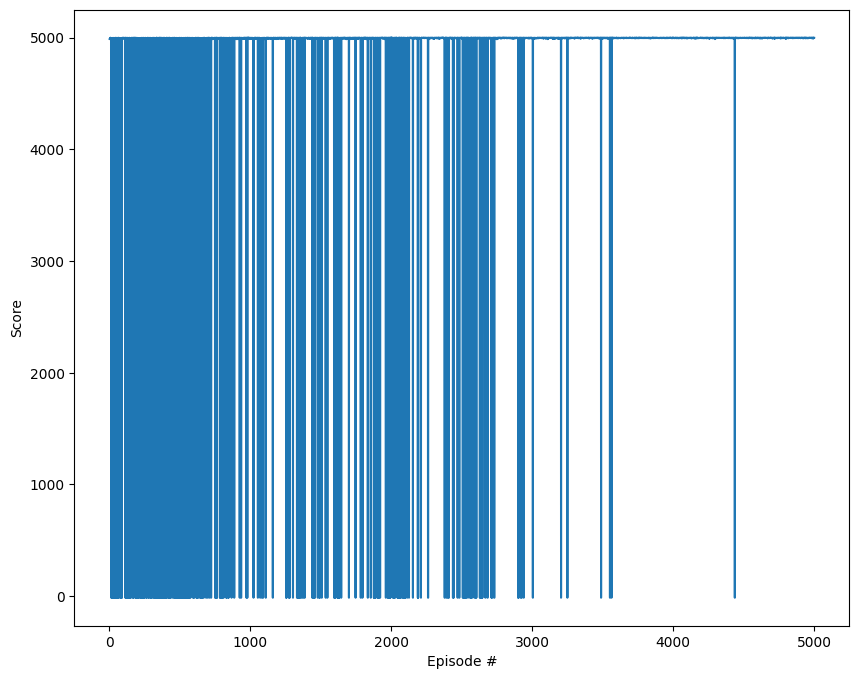

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

plot the steps

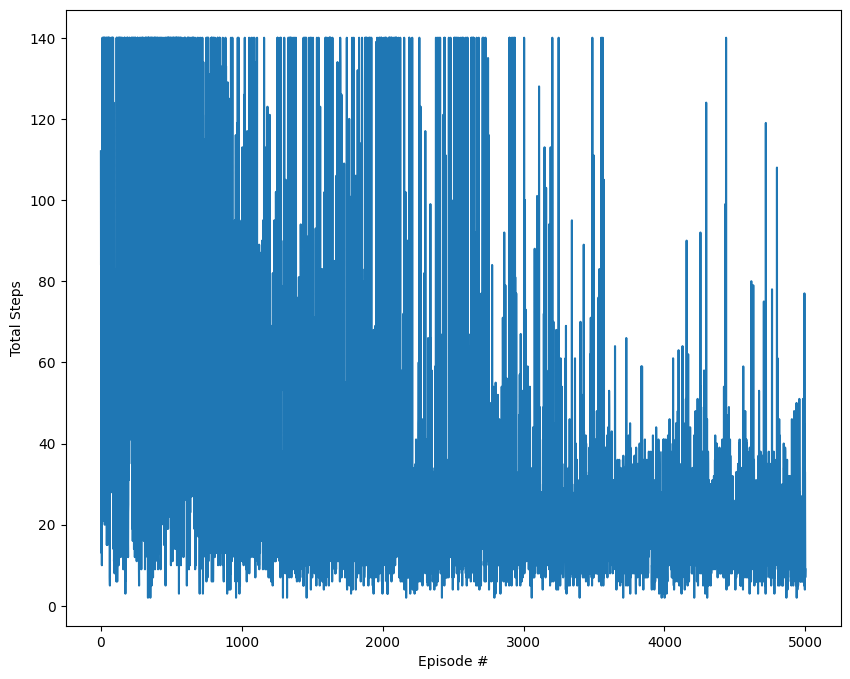

In [48]:
# plot the steps
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(steps)+1), steps)
plt.ylabel('Total Steps')
plt.xlabel('Episode #')
plt.show()

## Videos

In [31]:
policy.eval()  # Set the network to evaluation mode if you're using it for inference

PolicyNetwork(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=12544, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
    (4): Softmax(dim=-1)
  )
)

### Video with trained solver

In [ ]:
embed_mp4(os.path.join(base_dir, f'pg_vid_final.mp4'))

### Videos from training in progress

Video after 500 episodes training

In [38]:
embed_mp4(os.path.join(base_dir, 'pg_vid_500.mp4'))

Video after 800 episodes training

In [39]:
embed_mp4(os.path.join(base_dir, 'pg_vid_800.mp4'))

Video after 1500 episodes training

In [40]:
embed_mp4(os.path.join(base_dir, 'pg_vid_1500.mp4'))

## Evaluating average step count

In [41]:
env = EMPTYRGBImgObsWrapper(RandomEmptyEnv_10 (render_mode='rgb_array'))
env = PreprocessWrapper(env)
obs = env.reset()[0]

steps_per_episodes = []
num_of_games = 100
# Evaluation
for i in range (num_of_games):
  obs = env.reset()[0]
  step_count = 0
  state = obs
  done = False
  total_reward = 0
  for step in range(max_steps):
      action, _ = policy.run(state)
      obs, reward, done, _, _ = env.step(action)
      step_count += 1
      state = obs  # Get agent's position directly from the environment
      if done:
        break

  steps_per_episodes.append(step_count)

avg = sum(steps_per_episodes)/len(steps_per_episodes)
print(f'avg is {avg}')
median = np.median(steps_per_episodes)
print(f'median is {median}')

avg is 50.18
median is 36.5


## Loading saved model for inference

In [42]:
policy = PolicyNetwork(state_shape=state_shape, action_size=action_size, seed=40).to(device)
policy.load_state_dict(torch.load(MODEL_PATH, map_location=device))
policy.eval() # Set the network to evaluation mode if you're using it for inference

(1, 144, 144)
input shape: (1, 144, 144)


PolicyNetwork(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
  )
  (fc): Sequential(
    (0): Linear(in_features=12544, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=128, out_features=3, bias=True)
    (4): Softmax(dim=-1)
  )
)